## This notebook is intended to make a dataset that can be used to make models for the Movie Rating Predicition Task - Technocolabs
First, let's begin with importing the required libraries I will be using in this notebook.

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

**Importing the data and getting some idea about it**

In [87]:
data = pd.read_csv('preprocessed.csv')
data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,posterID,cast,crew,keywords,Imdb Link,Title,IMDB Score,Genre,Poster,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,0.jpg,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",http://www.imdb.com/title/tt114709,Toy Story (1995),8.3,Animation|Adventure|Comedy,https://images-na.ssl-images-amazon.com/images...,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,1.jpg,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",http://www.imdb.com/title/tt113497,Jumanji (1995),6.9,Action|Adventure|Family,https://images-na.ssl-images-amazon.com/images...,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,2.jpg,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",http://www.imdb.com/title/tt113228,Grumpier Old Men (1995),6.6,Comedy|Romance,https://images-na.ssl-images-amazon.com/images...,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,3.jpg,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",http://www.imdb.com/title/tt114885,Waiting to Exhale (1995),5.7,Comedy|Drama|Romance,https://images-na.ssl-images-amazon.com/images...,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371

In [88]:
data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'posterID', 'cast', 'crew', 'keywords',
       'Imdb Link', 'Title', 'IMDB Score', 'Genre', 'Poster', 'num_faces',
       'brightness', 'saturation', 'hue', 'brightness_sd', 'saturation_sd ',
       'hue_sd', 'blue', 'blue_sd', 'green', 'green_sd', 'red', 'red_sd '],
      dtype='object')

In [89]:
data.shape

(37210, 46)

**First I will take care out the columns that are of no use to me for the analysis. And also get rid of some null values that can be filled with mean or other methods**

In [90]:
columns_to_drop = ['homepage', 'imdb_id', 'original_title','poster_path', 'release_date', 'spoken_languages', 'status', 'video', 'posterID', 'keywords', 'Imdb Link', 'Title', 'Poster']
data_c = data.drop(columns = columns_to_drop)
data_c.head()

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,cast,crew,IMDB Score,Genre,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,NaN,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",8.3,Animation|Adventure|Comedy,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",6.9,Action|Adventure|Family,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",6.6,Comedy|Romance,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",5.7,Comedy|Drama|Romance,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",5.9,Comedy|Family|Romance,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367


In [91]:
data_c.isnull().sum()

adult                        0
belongs_to_collection    33292
budget                       0
genres                       0
id                           0
original_language            5
overview                   637
popularity                   0
production_companies         0
production_countries         0
revenue                      0
runtime                    148
tagline                  19400
title                        0
vote_average                 0
vote_count                   0
cast                         0
crew                         0
IMDB Score                  17
Genre                      122
num_faces                    0
brightness                   0
saturation                   0
hue                          0
brightness_sd                0
saturation_sd                0
hue_sd                       0
blue                         0
blue_sd                      0
green                        0
green_sd                     0
red                          0
red_sd  

<AxesSubplot:>

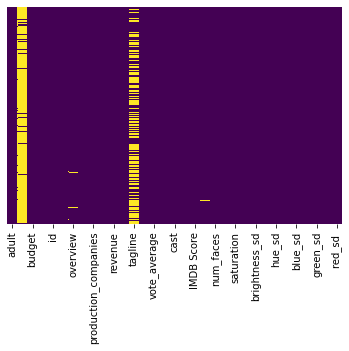

In [92]:
sns.heatmap(data_c.isnull(),yticklabels=False,cbar=False,cmap='viridis')

For our modelling the runtime is an important feature so we can't have null values in that column, so we will add mean score of the column to the NaN values in the dataframe.

In [93]:
data_c['runtime'] = data_c['runtime'].fillna(data_c['runtime'].mean())
data_c['runtime'].isnull().sum()

0

In [94]:
data_c['IMDB Score'] = data_c['IMDB Score'].fillna(data_c['IMDB Score'].mean())
data_c['IMDB Score'].isnull().sum()

0

In [95]:
data_c.isnull().sum()

adult                        0
belongs_to_collection    33292
budget                       0
genres                       0
id                           0
original_language            5
overview                   637
popularity                   0
production_companies         0
production_countries         0
revenue                      0
runtime                      0
tagline                  19400
title                        0
vote_average                 0
vote_count                   0
cast                         0
crew                         0
IMDB Score                   0
Genre                      122
num_faces                    0
brightness                   0
saturation                   0
hue                          0
brightness_sd                0
saturation_sd                0
hue_sd                       0
blue                         0
blue_sd                      0
green                        0
green_sd                     0
red                          0
red_sd  

Now there is no null value to be filled others are either categorical or not required variables and we will deal with them later.

**Now first I will deal with the easy to analyse columns at once and then concentrate on the nested more complex columns.**

---------------------------------------------------*ADULT Column*---------------------------------------------------------------

<AxesSubplot:xlabel='adult', ylabel='vote_average'>

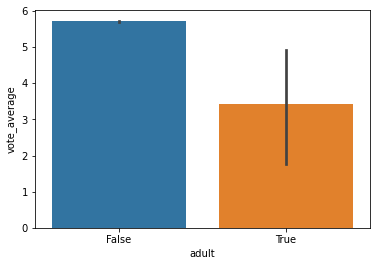

In [96]:
sns.barplot(x = 'adult', y = 'vote_average',data = data_c)

We can see that if the movie is adult it has realtively lower vote average than the one if it isn't.

<AxesSubplot:xlabel='adult', ylabel='count'>

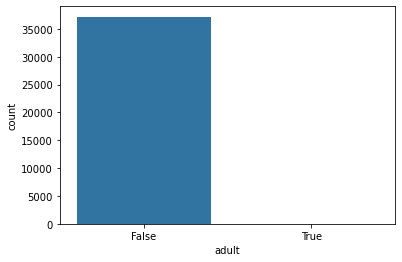

In [97]:
sns. countplot(data_c['adult'])

<AxesSubplot:xlabel='budget'>

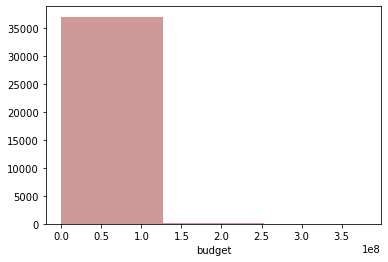

In [98]:
sns.distplot(data_c['budget'].dropna(),kde=False,color='darkred',bins=3)

#Normal distribution of Budget, No Anomaly

<AxesSubplot:>

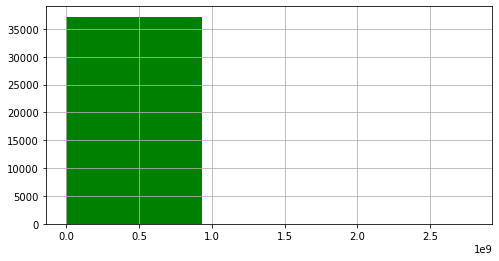

In [99]:
data_c['revenue'].hist(color='green',bins=3,figsize=(8,4))


#Normal Distribution of Revenue, No Anomly seen

We can see here that the False labels make up the whole dataset with True labels contributing a negligible part so the better option would be to drop this column.
**Hence, We are dropping the column 'Adult'**

----------------------------------------*BELONGS TO COLLECTION COLUMN*----------------------------------------------------------

Budget is the HIGHEST for English Movies.

I am thinking of making this column as a label column 0 for no collection and 1 if a collection in present.

<AxesSubplot:xlabel='original_language', ylabel='popularity'>

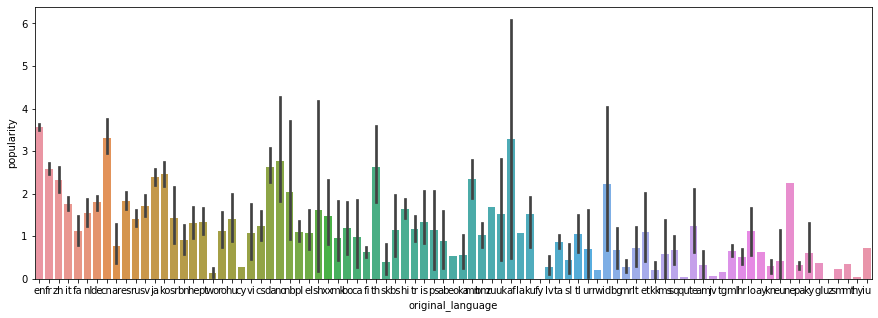

In [100]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = 'original_language', y = 'popularity',data = data_c)

<AxesSubplot:xlabel='budget', ylabel='revenue'>

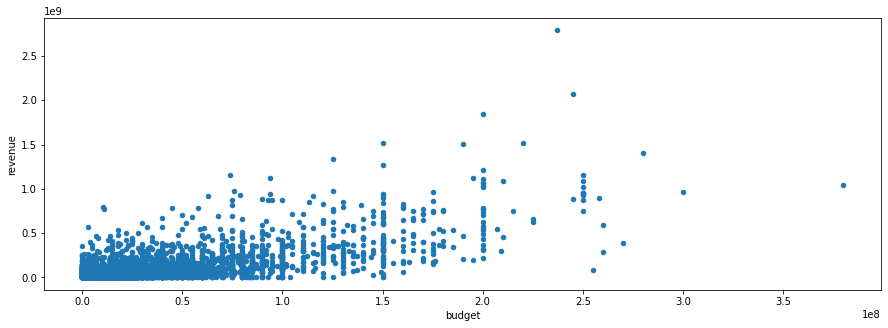

In [101]:
data_c.head(2)
data_c.plot.scatter(x='budget',y='revenue',colormap='viridis',figsize=(15,5))

<AxesSubplot:xlabel='adult', ylabel='revenue'>

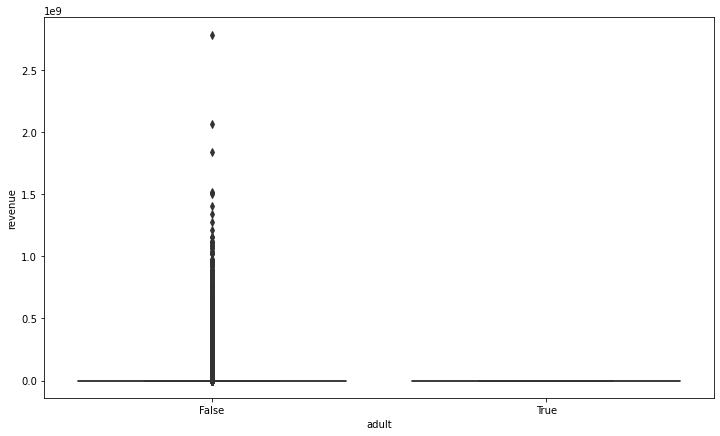

In [102]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='adult',y='revenue',data=data_c,palette='winter')

# Box Plot, Outlier found.

Fairly linear distribution between revenue and budget.Less budget Less Revenue, More Budget more revenue

In [103]:
data_c.fillna(0, inplace = True) #I am filling all the 'no collection' or NaN elements with 0.
for i,x in enumerate(data_c['belongs_to_collection']):
    if (x != 0):
        data_c['belongs_to_collection'][i] = 1
    else:
        data_c['belongs_to_collection'][i] = 0
data_c.head()

,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,vote_average,vote_count,cast,crew,IMDB Score,Genre,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
0,False,1,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,0,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",8.3,Animation|Adventure|Comedy,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055
1,False,0,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262797249.0,104.0,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",6.9,Action|Adventure|Family,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415
2,False,1,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",6.6,Comedy|Romance,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722
3,False,0,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",5.7,Comedy|Drama|Romance,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543
4,False,1,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",5.9,Comedy|Family|Romance,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367


<AxesSubplot:xlabel='belongs_to_collection', ylabel='vote_average'>

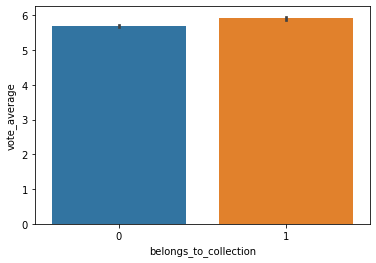

In [104]:
sns.barplot(x = 'belongs_to_collection', y = 'vote_average',data = data_c)

<AxesSubplot:xlabel='belongs_to_collection', ylabel='count'>

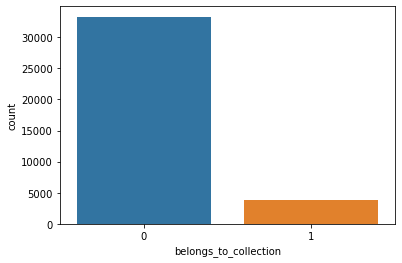

In [105]:
sns.countplot(x = 'belongs_to_collection',data = data_c)

We don't see much dependency of a certain category over the vote_average. It's fairly similar. Also, we see that '0' contributes for more movies than '1' but '1' is also having a respectable number of movies near to 5000. So, we will keep this column.
**belongs to collection column will be kept in the final dataset**

----------------------------------------------------*GENRE COLUMN*--------------------------------------------------------------

Now, let us deal with the genres column. Genre is definitely an important component to predict ratings. So, I am thinking of dummifying it. Also, in the paper genre was the most important feature so going by that we need to incorporate all values for genre.

In [106]:
df_genre = data_c.loc[:,['genres', 'id']]

In [107]:
# In this cell I get rid of the literals and make a dataframe of just the genre and id
all_genre = []
for i in range(df_genre.shape[0]):
    genre = ast.literal_eval(df_genre['genres'][i])
    for dic in genre:
        dic['id'] = df_genre['id'][i]
    all_genre.extend(genre)
df_genre = pd.DataFrame(all_genre)
df_genre

,id,name
0,862,Animation
1,862,Comedy
2,862,Family
3,8844,Adventure
4,8844,Fantasy
...,...,...
76410,378918,Drama
76411,378918,Thriller
76412,331214,Action
76413,331214,Drama


In [108]:
df_genre['tmp'] = 1
df_genre.rename(columns = {'name':'genre'}, inplace = True)
df_genre

,id,genre,tmp
0,862,Animation,1
1,862,Comedy,1
2,862,Family,1
3,8844,Adventure,1
4,8844,Fantasy,1
...,...,...,...
76410,378918,Drama,1
76411,378918,Thriller,1
76412,331214,Action,1
76413,331214,Drama,1


### *Add this dataframe to incorporate the genre columns to the final dataset*

In [109]:
#In this cell I create a dataframe for every valid movie id and put a 1 in front of the genre it has. 
pivot = df_genre.pivot_table('tmp', 'id', 'genre', fill_value = 0)
df_genre_f = pd.DataFrame(pivot.to_records())
df_genre_f

,id,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,2,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35484,458961,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35485,460870,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
35486,462788,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
35487,468343,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


Now, Our genre column is ready to be merged. **We need to merge with original dataset**


---------------------------------------*ORIGINAL LANGUAGE COLUMN*---------------------------------------------------------------

We'll see how the language affects the vote_average and it's distribution to make a decision of keeping it or not.

In [110]:
data_c.original_language.nunique()

88

<AxesSubplot:xlabel='original_language', ylabel='vote_average'>

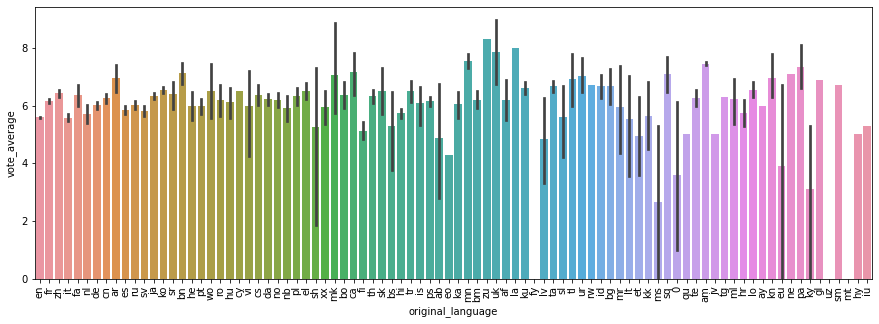

In [111]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 90)
sns.barplot(x = 'original_language', y = 'vote_average',data = data_c)

Seems equal distribution with respect to language. Inference: Langauge column can be dropped

<AxesSubplot:xlabel='original_language', ylabel='budget'>

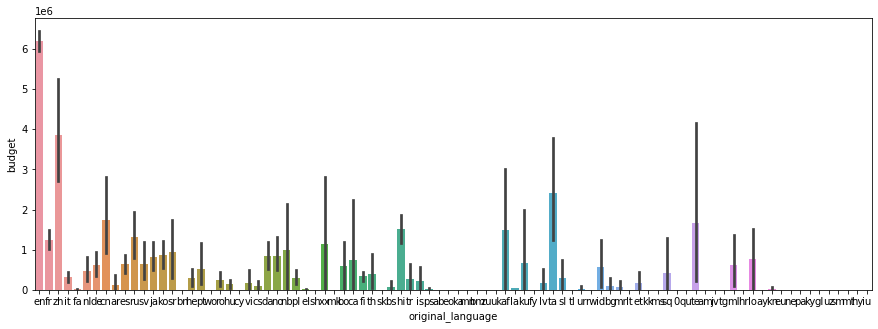

In [112]:
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = 'original_language', y = 'budget',data = data_c)

<AxesSubplot:xlabel='original_language', ylabel='count'>

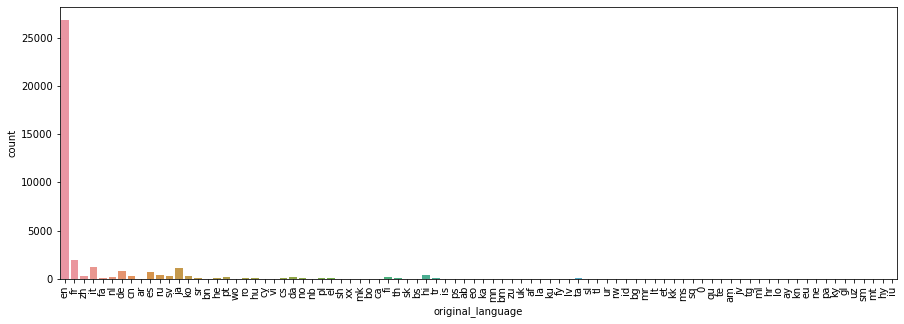

In [113]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 90)
sns.countplot(x = 'original_language',data = data_c)

We can see there is no visible change in vote_avg as all have nearly the same mean. It will make our dataset huge if we were to encode these categories also It's safe to assume that original_language is not a required feature for our training as majority of it is in 'en' as the countplot suggests so I will be dropping it. 
**Hence, we are dropping the column original_language**.

----------------------------------------------*PRODUCTION COMPANY COLUMN*-------------------------------------------------------

I shall keep 'overview' column on hold and I will proceed with 'production companies'. We are basically doing the same thing as the genre column as this column is also nested.

In [114]:
df_prod = data_c[['production_companies', 'id']]
df_prod.head()

,production_companies,id
0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",862
1,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",8844
2,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",15602
3,[{'name': 'Twentieth Century Fox Film Corporat...,31357
4,"[{'name': 'Sandollar Productions', 'id': 5842}...",11862


In [115]:
df_prod['production_companies'] = df_prod['production_companies'].fillna('[]').apply(ast.literal_eval)

In [116]:
for i in range(df_prod.shape[0]):
    temp = df_prod.loc[i,'production_companies']

    try : 
        df_prod.loc[i, 'production_company_1'] = temp[0]['name']
    except :
         df_prod.loc[i, 'production_company_1'] = np.nan
    try : 
        df_prod.loc[i, 'production_company_2'] = temp[1]['name']
    except :
         df_prod.loc[i, 'production_company_2'] = np.nan

In [117]:
df_prod.head()

,production_companies,id,production_company_1,production_company_2
0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",862,Pixar Animation Studios,NaN
1,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",8844,TriStar Pictures,Teitler Film
2,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",15602,Warner Bros.,Lancaster Gate
3,[{'name': 'Twentieth Century Fox Film Corporat...,31357,Twentieth Century Fox Film Corporation,NaN
4,"[{'name': 'Sandollar Productions', 'id': 5842}...",11862,Sandollar Productions,Touchstone Pictures


In [118]:
df_prod_f = df_prod.drop(columns = ['production_companies'])

### *Add this dataframe to incorporate the production companies columns to the final dataset*

In [119]:
df_prod_f.head()

,id,production_company_1,production_company_2
0,862,Pixar Animation Studios,NaN
1,8844,TriStar Pictures,Teitler Film
2,15602,Warner Bros.,Lancaster Gate
3,31357,Twentieth Century Fox Film Corporation,NaN
4,11862,Sandollar Productions,Touchstone Pictures


We are using the first two production companies in the dictionary provided as our columns for the respective id's.

-----------------------------------------------PRODUCTION COUNTRIES-------------------------------------------------------------

In this part I try to see if the productin countries should be incorporated or not, let us make a dataframe for production_countries. We do the same thing we did previously.

In [120]:
df_pc = data_c[['production_countries', 'id']]
df_pc.head()

,production_countries,id
0,"[{'iso_3166_1': 'US', 'name': 'United States o...",862
1,"[{'iso_3166_1': 'US', 'name': 'United States o...",8844
2,"[{'iso_3166_1': 'US', 'name': 'United States o...",15602
3,"[{'iso_3166_1': 'US', 'name': 'United States o...",31357
4,"[{'iso_3166_1': 'US', 'name': 'United States o...",11862


In [121]:
all_pc = []
for i in range(df_pc.shape[0]):
    country = ast.literal_eval(df_pc['production_countries'][i])
    for dic in country:
        dic['id'] = df_pc['id'][i]
    all_pc.extend(country)
df_pc = pd.DataFrame(all_pc)
df_pc.head()

,iso_3166_1,name,id
0,US,United States of America,862
1,US,United States of America,8844
2,US,United States of America,15602
3,US,United States of America,31357
4,US,United States of America,11862


In [122]:
df_pc.drop(columns = ['iso_3166_1'], inplace = True)
df_pc.rename(columns = {'name': 'country'}, inplace = True)
df_pc.country.nunique()

157

In [123]:
# Here I am creating a count column to tell me how frequently the company has appeared in the dataset.
df_pc['count'] = df_pc.groupby('country')['country'].transform('count')
df_pc.head()

,country,id,count
0,United States of America,862,18092
1,United States of America,8844,18092
2,United States of America,15602,18092
3,United States of America,31357,18092
4,United States of America,11862,18092


In [124]:
df_pc.describe()

,id,count
count,41204.000000,41204.000000
mean,84599.636395,8848.717746
std,95359.995989,8235.269712
min,2.000000,1.000000
25%,18385.000000,1357.000000
50%,44942.000000,3494.000000
75%,109809.000000,18092.000000
max,469172.000000,18092.000000


<AxesSubplot:xlabel='country', ylabel='count'>

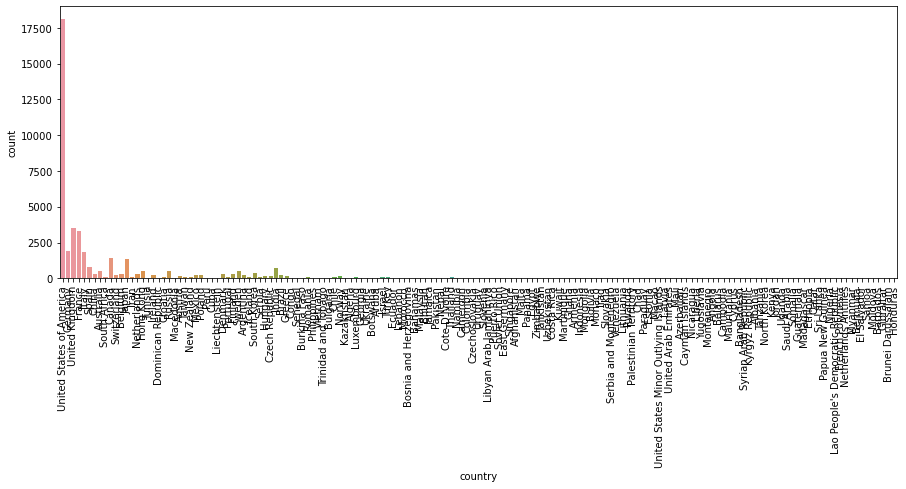

In [125]:
fig, ax = plt.subplots(figsize=(15,5))
plt.xticks(rotation = 90)
sns.countplot(df_pc['country'])

We can see quite the majority of the countries are in the United States and other countries contribute almost nothing to our dataset. So, it is safe to drop this column. 
**Hence, we are dropping the column production countries.**

--------------------------------------------CAST AND CREW COLUMNS---------------------------------------------------------------

Now, let us look at the column of cast in the next code lines. I am basically doing the same thing I did previously.

In [126]:
df_cast = data_c[['cast', 'id']]
df_cast.head()

,cast,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...",11862


In [127]:
all_casts = []
for i in range(df_cast.shape[0]):
    cast = ast.literal_eval(df_cast['cast'][i])
    for dic in cast:
        dic['id'] = df_cast['id'][i]
    all_casts.extend(cast)
df_cast = pd.DataFrame(all_casts)
df_cast.head()

,cast_id,character,credit_id,gender,id,name,order,profile_path
0,14,Woody (voice),52fe4284c3a36847f8024f95,2,862,Tom Hanks,0,/pQFoyx7rp09CJTAb932F2g8Nlho.jpg
1,15,Buzz Lightyear (voice),52fe4284c3a36847f8024f99,2,862,Tim Allen,1,/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg
2,16,Mr. Potato Head (voice),52fe4284c3a36847f8024f9d,2,862,Don Rickles,2,/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg
3,17,Slinky Dog (voice),52fe4284c3a36847f8024fa1,2,862,Jim Varney,3,/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg
4,18,Rex (voice),52fe4284c3a36847f8024fa5,2,862,Wallace Shawn,4,/oGE6JqPP2xH4tNORKNqxbNPYi7u.jpg


In [128]:
df_cast.drop(columns = ['cast_id', 'credit_id', 'profile_path'], inplace = True)
df_cast.name.nunique()

178442

In [129]:
df_cast[df_cast['order'] == 0].name.nunique()

13024

In [130]:
df_lead = df_cast[df_cast['order'] == 0]

In [131]:
df_lead.head()

,character,gender,id,name,order
0,Woody (voice),2,862,Tom Hanks,0
13,Alan Parrish,2,8844,Robin Williams,0
39,Max Goldman,2,15602,Walter Matthau,0
46,Savannah 'Vannah' Jackson,1,31357,Whitney Houston,0
56,George Banks,2,11862,Steve Martin,0


In [132]:
df_lead = df_lead.drop(columns = ['gender', 'character', 'order']).rename(columns = {'name':'Lead_Actor'})
df_lead.head()

,id,Lead_Actor
0,862,Tom Hanks
13,8844,Robin Williams
39,15602,Walter Matthau
46,31357,Whitney Houston
56,11862,Steve Martin


### *Add this dataframe to incorporate the lead actor column to the final dataset*

In [133]:
df_lead_f = df_lead.copy()# Use this

### *Add this dataframe to incorporate the supporting actor column to the final dataset*

In [134]:
df_support = df_cast[df_cast['order'] == 1]

In [135]:
df_support_f = df_support.drop(columns = ['gender', 'character', 'order']).rename(columns = {'name':'Supporting_Actor'})
df_support_f.head() ##Use this

,id,Supporting_Actor
1,862,Tim Allen
14,8844,Jonathan Hyde
40,15602,Jack Lemmon
47,31357,Angela Bassett
57,11862,Diane Keaton


The reasearch paper suggests actors and directors don't really affect the rating values but we are still keeping them for our analysis and come with features dependency. 

----------------------------------------------------CREW COLUMN-----------------------------------------------------------------

Now let us proceed to the crew column for our analysis. I am again doing the same thing I did for other nested columns. 

In [136]:
df_crew = data_c[['crew', 'id']]
df_crew

,crew,id
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862
...,...,...
37205,"[{'credit_id': '580b96779251416efe003a06', 'de...",188836
37206,"[{'credit_id': '56a3661fc3a368389b002cd0', 'de...",378918
37207,"[{'credit_id': '56731cd9c3a368070c002fbd', 'de...",331214
37208,[],409926


In [137]:
df_crew['crew'] = df_crew['crew'].fillna('[]').apply(ast.literal_eval)

In [138]:
df_crew['crew'][0]

[{'credit_id': '52fe4284c3a36847f8024f49',
  'department': 'Directing',
  'gender': 2,
  'id': 7879,
  'job': 'Director',
  'name': 'John Lasseter',
  'profile_path': '/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f4f',
  'department': 'Writing',
  'gender': 2,
  'id': 12891,
  'job': 'Screenplay',
  'name': 'Joss Whedon',
  'profile_path': '/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f55',
  'department': 'Writing',
  'gender': 2,
  'id': 7,
  'job': 'Screenplay',
  'name': 'Andrew Stanton',
  'profile_path': '/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f5b',
  'department': 'Writing',
  'gender': 2,
  'id': 12892,
  'job': 'Screenplay',
  'name': 'Joel Cohen',
  'profile_path': '/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg'},
 {'credit_id': '52fe4284c3a36847f8024f61',
  'department': 'Writing',
  'gender': 0,
  'id': 12893,
  'job': 'Screenplay',
  'name': 'Alec Sokolow',
  'profile_path': '/v79vlRYi94BZUQnkkyzn

In [139]:
for i in range(df_crew.shape[0]):
    count = 0
    temp = df_crew.loc[i,'crew']
    for j in range(len(temp)):
        if temp[j]['job'] == 'Director':
            if count < 1:
                    df_crew.loc[i, 'Director'] = temp[j]['name']
                    count = count + 1
            else:
                break

In [140]:
df_crew.head()

,crew,id,Director
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter
1,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston
2,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch
3,"[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker
4,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer


### *Add this dataframe to incorporate the Director column to the final dataset*

In [141]:
df_crew_director = df_crew.drop(columns = ['crew'])
df_crew_director.head()

,id,Director
0,862,John Lasseter
1,8844,Joe Johnston
2,15602,Howard Deutch
3,31357,Forest Whitaker
4,11862,Charles Shyer


In [142]:
for i in range(df_crew.shape[0]):
    count = 0
    temp = df_crew.loc[i,'crew']
    for j in range(len(temp)):
        if temp[j]['job'] == 'Producer':
            if count < 1:
                    df_crew.loc[i, 'Producer'] = temp[j]['name']
                    count = count + 1
            else:
                break

In [143]:
df_crew.head()

,crew,id,Director,Producer
0,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,John Lasseter,Bonnie Arnold
1,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,Joe Johnston,Scott Kroopf
2,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,Howard Deutch,NaN
3,"[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,Forest Whitaker,Ronald Bass
4,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,Charles Shyer,Nancy Meyers


### *Add this dataframe to incorporate the producer column to the final dataset*

In [144]:
df_crew_producer = df_crew.drop(columns = ['crew', 'Director'])
df_crew_producer.head()

,id,Producer
0,862,Bonnie Arnold
1,8844,Scott Kroopf
2,15602,NaN
3,31357,Ronald Bass
4,11862,Nancy Meyers


As we can see we have only considered the first director and producer that comes for a movie id in the dictionary formed. That way we reduced the size of our data so our modelling part can be done easily.

## Now that we have done almost all analysis of all columns now comes the part to merge the dataset together.

In [145]:
data_c.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'id',
       'original_language', 'overview', 'popularity', 'production_companies',
       'production_countries', 'revenue', 'runtime', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'IMDB Score', 'Genre',
       'num_faces', 'brightness', 'saturation', 'hue', 'brightness_sd',
       'saturation_sd ', 'hue_sd', 'blue', 'blue_sd', 'green', 'green_sd',
       'red', 'red_sd '],
      dtype='object')

In [146]:
final_dataset = data_c.copy()

In [147]:
columns_to_drop1 = ['adult', 'Genre', 'original_language','production_countries', 'production_companies', 'crew', 'cast', 'genres', 'overview', 'tagline', 'title']
final_dataset = final_dataset.drop(columns = columns_to_drop1)
final_dataset.head()

,belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,IMDB Score,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd
0,1,30000000,862,21.946943,373554033.0,81.0,7.7,5415.0,8.3,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055
1,0,65000000,8844,17.015539,262797249.0,104.0,6.9,2413.0,6.9,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415
2,1,0,15602,11.712900,0.0,101.0,6.5,92.0,6.6,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722
3,0,16000000,31357,3.859495,81452156.0,127.0,6.1,34.0,5.7,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543
4,1,0,11862,8.387519,76578911.0,106.0,5.7,173.0,5.9,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367


In [148]:
final_dataset.shape

(37210, 22)

### Adding genre

In [149]:
final_dataset = pd.merge(final_dataset, df_genre_f, on = 'id', how = 'left')
final_dataset.head()

,belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,IMDB Score,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,30000000,862,21.946943,373554033.0,81.0,7.7,5415.0,8.3,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,65000000,8844,17.015539,262797249.0,104.0,6.9,2413.0,6.9,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,15602,11.712900,0.0,101.0,6.5,92.0,6.6,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,16000000,31357,3.859495,81452156.0,127.0,6.1,34.0,5.7,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,1,0,11862,8.387519,76578911.0,106.0,5.7,173.0,5.9,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
final_dataset.fillna(0, inplace = True)

### Adding production companies.

In [151]:
final_dataset_1 = pd.merge(final_dataset, df_prod_f, on = 'id', how = 'left')
final_dataset_1.head()

,belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,IMDB Score,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,production_company_1,production_company_2
0,1,30000000,862,21.946943,373554033.0,81.0,7.7,5415.0,8.3,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pixar Animation Studios,NaN
1,0,65000000,8844,17.015539,262797249.0,104.0,6.9,2413.0,6.9,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TriStar Pictures,Teitler Film
2,1,0,15602,11.712900,0.0,101.0,6.5,92.0,6.6,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Warner Bros.,Lancaster Gate
3,0,16000000,31357,3.859495,81452156.0,127.0,6.1,34.0,5.7,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Twentieth Century Fox Film Corporation,NaN
4,1,0,11862,8.387519,76578911.0,106.0,5.7,173.0,5.9,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sandollar Productions,Touchstone Pictures


### Adding Lead Actors

In [152]:
final_dataset_2 = pd.merge(final_dataset_1, df_lead_f, on = 'id', how = 'left')
final_dataset_2

,belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,IMDB Score,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,production_company_1,production_company_2,Lead_Actor
0,1,30000000,862,21.946943,373554033.0,81.0,7.7,5415.0,8.3,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pixar Animation Studios,NaN,Tom Hanks
1,0,65000000,8844,17.015539,262797249.0,104.0,6.9,2413.0,6.9,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TriStar Pictures,Teitler Film,Robin Williams
2,1,0,15602,11.712900,0.0,101.0,6.5,92.0,6.6,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Warner Bros.,Lancaster Gate,Walter Matthau
3,0,16000000,31357,3.859495,81452156.0,127.0,6.1,34.0,5.7,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Twentieth Century Fox Film Corporation,NaN,Whitney Houston
4,1,0,11862,8.387519,76578911.0,106.0,5.7,173.0,5.9,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sandollar Productions,Touchstone Pictures,Steve Martin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37212,0,0,188836,0.009192,0.0,90.0,6.0,1.0,6.5,0.0,137.944220,147.895754,31.190620,70.304200,59.878772,56.662405,72.132719,63.926352,87.447230,72.378060,136.086054,69.773578,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hong Kong Alpha Motion Pictures Co.,NaN,Peter Chang Chi-Long
37213,0,0,378918,0.053082,0.0,73.0,0.0,0.0,6.5,2.0,93.685120,87.156244,57.353017,45.494670,40.016072,42.966539,71.281226,41.582517,76.508343,33.598967,79.284969,44.948591,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,ABC Circle Films,NaN,NaN
37214,0,125000000,331214,7.903731,0.0,705.0,8.2,725.0,9.5,0.0,50.502352,54.164161,19.874748,72.731795,70.158693,29.298929,42.719089,68.005473,49.436667,71.994176,50.301893,72.647500,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,HBO,NaN,Damian Lewis
37215,0,0,409926,0.282584,0.0,60.0,9.1,41.0,9.3,0.0,31.722454,116.406248,85.037891,50.465829,43.340956,79.016338,22.996002,44.298915,24.703415,45.441407,29.701622,45.840503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


### Adding Support Actor

In [153]:
final_dataset_3 = pd.merge(final_dataset_2, df_support_f, on = 'id', how = 'left')
final_dataset_3

,belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,IMDB Score,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,production_company_1,production_company_2,Lead_Actor,Supporting_Actor
0,1,30000000,862,21.946943,373554033.0,81.0,7.7,5415.0,8.3,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pixar Animation Studios,NaN,Tom Hanks,Tim Allen
1,0,65000000,8844,17.015539,262797249.0,104.0,6.9,2413.0,6.9,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TriStar Pictures,Teitler Film,Robin Williams,Jonathan Hyde
2,1,0,15602,11.712900,0.0,101.0,6.5,92.0,6.6,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Warner Bros.,Lancaster Gate,Walter Matthau,Jack Lemmon
3,0,16000000,31357,3.859495,81452156.0,127.0,6.1,34.0,5.7,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Twentieth Century Fox Film Corporation,NaN,Whitney Houston,Angela Bassett
4,1,0,11862,8.387519,76578911.0,106.0,5.7,173.0,5.9,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sandollar Productions,Touchstone Pictures,Steve Martin,Diane Keaton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37220,0,0,188836,0.009192,0.0,90.0,6.0,1.0,6.5,0.0,137.944220,147.895754,31.190620,70.304200,59.878772,56.662405,72.132719,63.926352,87.447230,72.378060,136.086054,69.773578,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hong Kong Alpha Motion Pictures Co.,NaN,Peter Chang Chi-Long,Hwa Ling
37221,0,0,378918,0.053082,0.0,73.0,0.0,0.0,6.5,2.0,93.685120,87.156244,57.353017,45.494670,40.016072,42.966539,71.281226,41.582517,76.508343,33.598967,79.284969,44.948591,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,ABC Circle Films,NaN,NaN,Howard Duff
37222,0,125000000,331214,7.903731,0.0,705.0,8.2,725.0,9.5,0.0,50.502352,54.164161,19.874748,72.731795,70.158693,29.298929,42.719089,68.005473,49.436667,71.994176,50.301893,72.647500,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,HBO,NaN,Damian Lewis,Ron Livingston
37223,0,0,409926,0.282584,0.0,60.0,9.1,41.0,9.3,0.0,31.722454,116.406248,85.037891,50.465829,43.340956,79.016338,22.996002,44.298915,24.703415,45.441407,29.701622,45.840503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


### Adding directors

In [154]:
final_dataset_4 = pd.merge(final_dataset_3, df_crew_director, on = 'id', how = 'left')
final_dataset_4

,belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,IMDB Score,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,production_company_1,production_company_2,Lead_Actor,Supporting_Actor,Director
0,1,30000000,862,21.946943,373554033.0,81.0,7.7,5415.0,8.3,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pixar Animation Studios,NaN,Tom Hanks,Tim Allen,John Lasseter
1,0,65000000,8844,17.015539,262797249.0,104.0,6.9,2413.0,6.9,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TriStar Pictures,Teitler Film,Robin Williams,Jonathan Hyde,Joe Johnston
2,1,0,15602,11.712900,0.0,101.0,6.5,92.0,6.6,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Warner Bros.,Lancaster Gate,Walter Matthau,Jack Lemmon,Howard Deutch
3,0,16000000,31357,3.859495,81452156.0,127.0,6.1,34.0,5.7,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Twentieth Century Fox Film Corporation,NaN,Whitney Houston,Angela Bassett,Forest Whitaker
4,1,0,11862,8.387519,76578911.0,106.0,5.7,173.0,5.9,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sandollar Productions,Touchstone Pictures,Steve Martin,Diane Keaton,Charles Shyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37220,0,0,188836,0.009192,0.0,90.0,6.0,1.0,6.5,0.0,137.944220,147.895754,31.190620,70.304200,59.878772,56.662405,72.132719,63.926352,87.447230,72.378060,136.086054,69.773578,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hong Kong Alpha Motion Pictures Co.,NaN,Peter Chang Chi-Long,Hwa Ling,Jimmy Shaw
37221,0,0,378918,0.053082,0.0,73.0,0.0,0.0,6.5,2.0,93.685120,87.156244,57.353017,45.494670,40.016072,42.966539,71.281226,41.582517,76.508343,33.598967,79.284969,44.948591,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,ABC Circle Films,NaN,NaN,Howard Duff,Sutton Roley
37222,0,125000000,331214,7.903731,0.0,705.0,8.2,725.0,9.5,0.0,50.502352,54.164161,19.874748,72.731795,70.158693,29.298929,42.719089,68.005473,49.436667,71.994176,50.301893,72.647500,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,HBO,NaN,Damian Lewis,Ron Livingston,Tom Hanks
37223,0,0,409926,0.282584,0.0,60.0,9.1,41.0,9.3,0.0,31.722454,116.406248,85.037891,50.465829,43.340956,79.016338,22.996002,44.298915,24.703415,45.441407,29.701622,45.840503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


### Adding producers

In [155]:
final_dataset_5 = pd.merge(final_dataset_4, df_crew_producer, on = 'id', how = 'left')
final_dataset_5

,belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,IMDB Score,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,production_company_1,production_company_2,Lead_Actor,Supporting_Actor,Director,Producer
0,1,30000000,862,21.946943,373554033.0,81.0,7.7,5415.0,8.3,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pixar Animation Studios,NaN,Tom Hanks,Tim Allen,John Lasseter,Bonnie Arnold
1,0,65000000,8844,17.015539,262797249.0,104.0,6.9,2413.0,6.9,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TriStar Pictures,Teitler Film,Robin Williams,Jonathan Hyde,Joe Johnston,Scott Kroopf
2,1,0,15602,11.712900,0.0,101.0,6.5,92.0,6.6,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Warner Bros.,Lancaster Gate,Walter Matthau,Jack Lemmon,Howard Deutch,NaN
3,0,16000000,31357,3.859495,81452156.0,127.0,6.1,34.0,5.7,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Twentieth Century Fox Film Corporation,NaN,Whitney Houston,Angela Bassett,Forest Whitaker,Ronald Bass
4,1,0,11862,8.387519,76578911.0,106.0,5.7,173.0,5.9,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sandollar Productions,Touchstone Pictures,Steve Martin,Diane Keaton,Charles Shyer,Nancy Meyers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37220,0,0,188836,0.009192,0.0,90.0,6.0,1.0,6.5,0.0,137.944220,147.895754,31.190620,70.304200,59.878772,56.662405,72.132719,63.926352,87.447230,72.378060,136.086054,69.773578,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Hong Kong Alpha Motion Pictures Co.,NaN,Peter Chang Chi-Long,Hwa Ling,Jimmy Shaw,NaN
37221,0,0,378918,0.053082,0.0,73.0,0.0,0.0,6.5,2.0,93.685120,87.156244,57.353017,45.494670,40.016072,42.966539,71.281226,41.582517,76.508343,33.598967,79.284969,44.948591,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,ABC Circle Films,NaN,NaN,Howard Duff,Sutton Roley,NaN
37222,0,125000000,331214,7.903731,0.0,705.0,8.2,725.0,9.5,0.0,50.502352,54.164161,19.874748,72.731795,70.158693,29.298929,42.719089,68.005473,49.436667,71.994176,50.301893,72.647500,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,HBO,NaN,Damian Lewis,Ron Livingston,Tom Hanks,Gary Goetzman
37223,0,0,409926,0.282584,0.0,60.0,9.1,41.0,9.3,0.0,31.722454,116.406248,85.037891,50.465829,43.340956,79.016338,22.996002,44.298915,24.703415,45.441407,29.701622,45.840503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
final_dataset_5.shape

(37225, 48)

In [157]:
final_dataset_5.duplicated().sum()

0

In [158]:
final_dataset_5.drop_duplicates(inplace = True)

In [159]:
final_dataset_5.duplicated().sum()

0

In [160]:
final_dataset_5.head()

,belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,IMDB Score,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,production_company_1,production_company_2,Lead_Actor,Supporting_Actor,Director,Producer
0,1,30000000,862,21.946943,373554033.0,81.0,7.7,5415.0,8.3,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pixar Animation Studios,NaN,Tom Hanks,Tim Allen,John Lasseter,Bonnie Arnold
1,0,65000000,8844,17.015539,262797249.0,104.0,6.9,2413.0,6.9,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TriStar Pictures,Teitler Film,Robin Williams,Jonathan Hyde,Joe Johnston,Scott Kroopf
2,1,0,15602,11.712900,0.0,101.0,6.5,92.0,6.6,0.0,139.380694,112.907880,48.908106,94.073346,70.979805,65.406756,97.464385,78.935691,106.743824,89.725921,136.728580,96.124722,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Warner Bros.,Lancaster Gate,Walter Matthau,Jack Lemmon,Howard Deutch,NaN
3,0,16000000,31357,3.859495,81452156.0,127.0,6.1,34.0,5.7,1.0,193.179470,78.009035,43.298337,71.637853,74.316934,57.431210,148.388970,88.371216,161.866089,82.379306,191.924122,72.849543,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Twentieth Century Fox Film Corporation,NaN,Whitney Houston,Angela Bassett,Forest Whitaker,Ronald Bass
4,1,0,11862,8.387519,76578911.0,106.0,5.7,173.0,5.9,1.0,140.167369,120.689856,19.093691,102.482222,85.251258,28.312941,94.287052,98.054007,110.440328,99.236678,136.537094,104.796367,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sandollar Productions,Touchstone Pictures,Steve Martin,Diane Keaton,Charles Shyer,Nancy Meyers


Now it is time to merge the ratings for the movie to the respective movie to make a predicition target for our dataset. For multiple movies we will use the mean of the ratings provided as the target. 

In [161]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [162]:
ratings.drop(columns = ['userId', 'timestamp'], inplace = True)

In [163]:
ratings.rename(columns = {'movieId':'id'}, inplace = True)
ratings.head()

,id,rating
0,110,1.0
1,147,4.5
2,858,5.0
3,1221,5.0
4,1246,5.0


In [164]:
ratings_grouped = ratings.groupby(['id'], as_index = False)['rating'].mean()

In [165]:
ratings_grouped.head()

,id,rating
0,1,3.888157
1,2,3.236953
2,3,3.175550
3,4,2.875713
4,5,3.079565


In [166]:
ratings_grouped.shape

(45115, 2)

In [167]:
ratings.shape

(26024289, 2)

As we can see above we have taken the mean for the ratings provided by the customers.

In [168]:
final_dataset_6 = pd.merge(final_dataset_5, ratings_grouped, on = 'id', how = 'inner')

In [169]:
final_dataset_6.head()

,belongs_to_collection,budget,id,popularity,revenue,runtime,vote_average,vote_count,IMDB Score,num_faces,brightness,saturation,hue,brightness_sd,saturation_sd,hue_sd,blue,blue_sd,green,green_sd,red,red_sd,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,production_company_1,production_company_2,Lead_Actor,Supporting_Actor,Director,Producer,rating
0,1,30000000,862,21.946943,373554033.0,81.0,7.7,5415.0,8.3,0.0,184.775439,190.399400,82.805137,58.496526,80.933495,46.984021,147.046133,83.046441,127.812661,59.618615,79.571854,88.574055,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pixar Animation Studios,NaN,Tom Hanks,Tim Allen,John Lasseter,Bonnie Arnold,3.598930
1,0,65000000,8844,17.015539,262797249.0,104.0,6.9,2413.0,6.9,0.0,166.807096,91.547633,65.296239,83.413251,67.319422,61.296055,132.472598,84.508776,137.041430,79.140584,137.619493,85.319415,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TriStar Pictures,Teitler Film,Robin Williams,Jonathan Hyde,Joe Johnston,Scott Kroopf,3.760163
2,0,60000000,949,17.924927,187436818.0,170.0,7.7,1886.0,8.2,3.0,45.715307,136.999480,76.802894,60.436514,105.250820,50.140706,45.673874,60.450938,32.473154,50.219471,18.711193,39.807756,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Regency Enterprises,Forward Pass,Al Pacino,Robert De Niro,Michael Mann,Art Linson,3.905544
3,1,58000000,710,14.686036,352194034.0,130.0,6.6,1194.0,7.2,0.0,109.660769,137.422763,72.647441,86.758819,82.646283,53.146266,90.230104,63.994524,81.994057,76.565656,83.986337,99.924202,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,United Artists,Eon Productions,Pierce Brosnan,Sean Bean,Martin Campbell,Barbara Broccoli,2.740334
4,0,98000000,1408,7.284477,10017322.0,119.0,5.7,137.0,5.6,0.0,163.764743,175.083098,21.076989,78.702461,76.101948,28.865624,50.619287,62.655518,112.207539,69.474845,163.692030,78.729542,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Le Studio Canal+,Laurence Mark Productions,Geena Davis,Matthew Modine,Renny Harlin,Joel B. Michaels,3.710181


Checking for duplicates.

In [170]:
final_dataset_6.duplicated().sum()

0

In [171]:
final_dataset_6.shape

(6634, 49)

In [172]:
final_dataset_6.to_csv('final_cleaned_preproecessed_file.csv', index = False)

So, our dataset for feeding into the model is ready. Basic preprocessing steps like scaling or normalization are still required on the dataset.
Thankyou.